In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.preprocessing import image
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [2]:
# Define the image directory (the folder where your images are stored)
image_directory = 'dataset/'
categories = os.listdir(image_directory)

# Create empty lists to store image data and labels
X = []
y = []

# Load and preprocess images from categorized subdirectories
for category in categories:
    category_path = os.path.join(image_directory, category)
    image_files = os.listdir(category_path)
    for img_file in image_files:
        img_path = os.path.join(category_path, img_file)
        img = image.load_img(img_path, target_size=(48, 48))  # Load RGB images
        img = image.img_to_array(img)
        img /= 255.0
        X.append(img)
        y.append(category)

# Convert labels to numerical values
labels = pd.get_dummies(y)

X = np.array(X)
y = labels.values

# Split data into train and validation sets
X, y = shuffle(X, y, random_state=42)  # Shuffle the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
print(categories)

['අ', 'අං', 'ආ', 'ඇ', 'ඈ', 'ඉ', 'ඊ', 'උ', 'ඌ', 'එ-', 'ඒ', 'ඔ', 'ඕ', 'ක=ක්+අ', 'ග=ග්+අ', 'ඟ', 'ච=ච්+අ', 'ජ=ජ්+අ', 'ට', 'ට=ට්+අ', 'ඩ=ඩ්+අ', 'ණ=ණ්+අ', 'ඬ', 'ත=ත්+අ', 'ද=ද්+අ', 'න=න්+අ-', 'ඳ', 'ප=ප්+අ-p', 'බ=බ්+අ', 'ම=ම්+අ', 'ඹ', 'ය= ය්+අ', 'ර = ර්+අ', 'ල = ල් + අ', 'ව=ව්+අ', 'ස=ස්+අ', 'හ=හ්+අ', 'ළ=ළ්+ අ']


In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 3)))  # Updated input shape to (48, 48, 3)
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(y.shape[1], activation='softmax'))  # Output layer with the number of categories

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 50

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_val, y_val))

# Save the model
model.save('model_ssl.h5')

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.0156 - loss: 3.6806 - val_accuracy: 0.0351 - val_loss: 3.6323
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.0670 - loss: 3.5805 - val_accuracy: 0.0351 - val_loss: 3.6472
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.0323 - loss: 3.5332 - val_accuracy: 0.0351 - val_loss: 3.6751
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.0423 - loss: 3.5368 - val_accuracy: 0.0351 - val_loss: 3.6298
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.0562 - loss: 3.5189 - val_accuracy: 0.0526 - val_loss: 3.6383
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.0712 - loss: 3.4994 - val_accuracy: 0.0702 - val_loss: 3.5805
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.0877 - loss: 3.3624 - val_accuracy: 0.1228 - val_loss: 3.4434
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.1150 - loss: 3.2370 - val_accuracy: 0.1053 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3490 (\N{SINHALA LETTER ALPAPRAANA JAYANNA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3530 (\N{SINHALA SIGN AL-LAKUNA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3461 (\N{SINHALA LETTER AYANNA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3515 (\N{SINHALA LETTER RAYAN

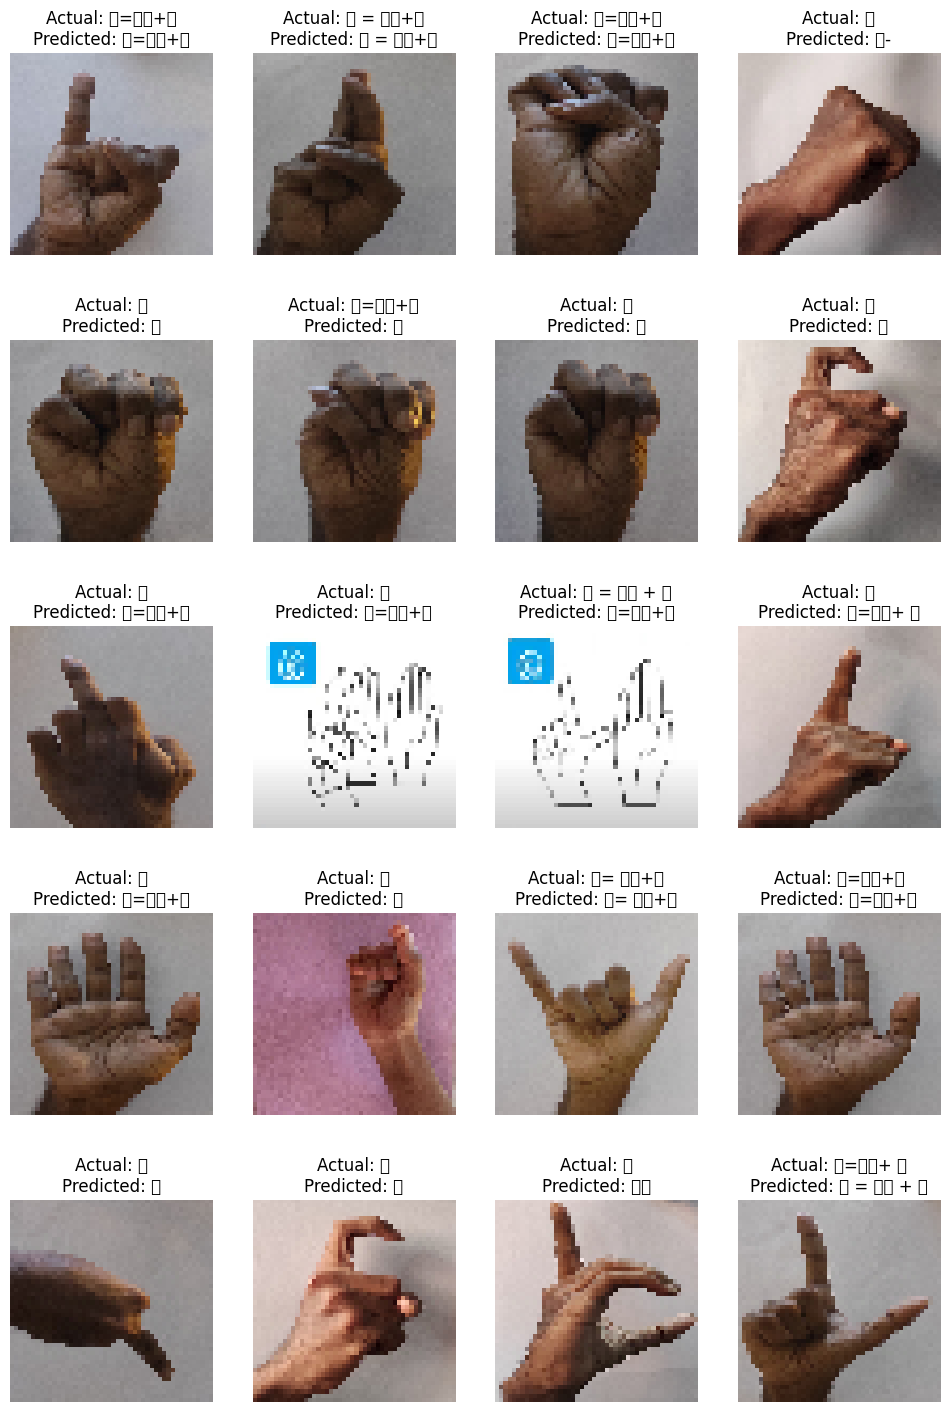

In [5]:

import matplotlib.pyplot as plt
import random
import numpy as np

# Data visualize
sample_size = 20
num_cols = 4
num_rows = sample_size // num_cols


random_indices = random.sample(range(len(X_val)), sample_size)
sample_images = X_val[random_indices]
sample_labels_actual = y_val[random_indices]
sample_labels_predicted = model.predict(sample_images)

# Classes
class_names = ['අ', 'අං', 'ආ', 'ඇ', 'ඈ', 'ඉ', 'ඊ', 'උ', 'ඌ', 'එ-', 'ඒ', 'ඔ', 'ඕ', 'ක=ක්+අ', 'ග=ග්+අ', 'ඟ', 'ච=ච්+අ', 'ජ=ජ්+අ', 'ට', 'ට=ට්+අ', 'ඩ=ඩ්+අ', 'ණ=ණ්+අ', 'ඬ', 'ත=ත්+අ', 'ද=ද්+අ', 'න=න්+අ-', 'ඳ', 'ප=ප්+අ-p', 'බ=බ්+අ', 'ම=ම්+අ', 'ඹ', 'ය= ය්+අ', 'ර = ර්+අ', 'ල = ල් + අ', 'ව=ව්+අ', 'ස=ස්+අ', 'හ=හ්+අ', 'ළ=ළ්+ අ']


plt.figure(figsize=(12, 18))
for i in range(sample_size):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(sample_images[i].reshape(48, 48, 3), cmap="gray")
    actual_class_index = np.argmax(sample_labels_actual[i])
    predicted_class_index = np.argmax(sample_labels_predicted[i])
    plt.title(f"Actual: {class_names[actual_class_index]}\nPredicted: {class_names[predicted_class_index]}")
    plt.axis('off')

plt.show()


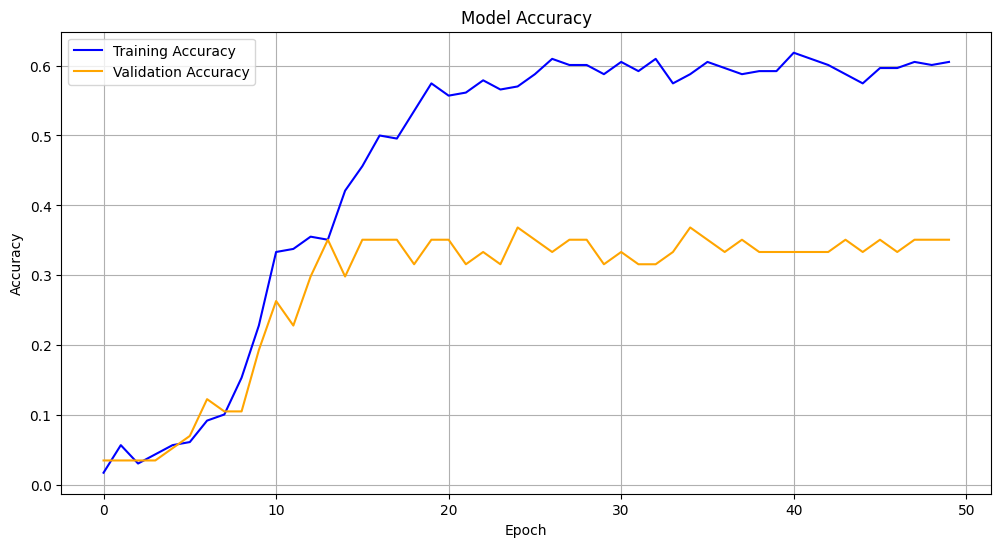

In [6]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

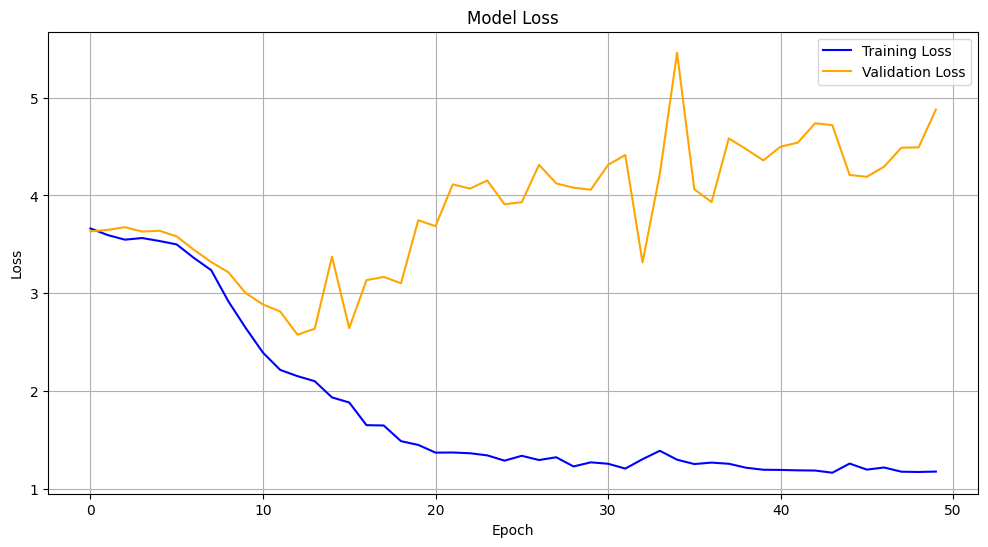

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


ValueError: The number of FixedLocator locations (33), usually from a call to set_ticks, does not match the number of labels (38).

<Figure size 1000x800 with 0 Axes>

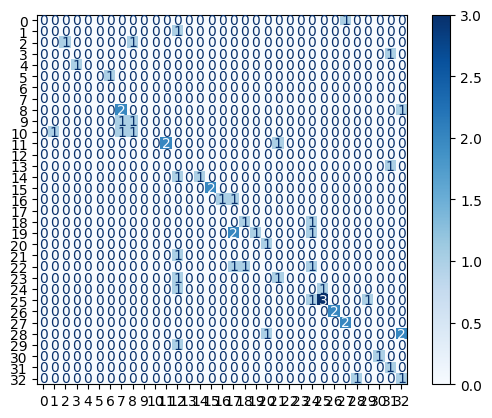

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict the validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted classes
y_true_classes = np.argmax(y_val, axis=1)  # True classes

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Display confusion matrix
class_names = [str(i) for i in range(y.shape[1])]  # Assuming categories are 0-9
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()
